# Explore here

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelado
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# escalado
from sklearn.preprocessing import StandardScaler

# encoding
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("/Users/SamuelHollis/Desktop/4GeeksAcademy/17a clase-ML/logistic_regression/data/raw/data", index_col=False)

# seleccion
from sklearn.feature_selection import f_classif, SelectKBest

# Regresion lieal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Crear dataframe

In [2]:
df = pd.DataFrame(data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


|   Variable    |                    Definición                    |                 categoria y clave                           |
|:-------------:|:------------------------------------------------:|:-----------------------------------------------------------:|
|      age      | Edad en años                                     |numerica                                                     |
|      sex      | Male/Female                                      |categorica                                                   |
|      bmi      | Índice de Masa Corporal                          |numerica                                                     |
|   children    | Número de hijos                                  |categorica                                                   |
|    smoker     | yes/no                                           |categorica                                                   |
|    region     | Región de procedencia                            |catrogrica (Northeast, Northwest, Southeast, Southwest)      |
|    charges    | Cargos/Costos médicos                            |numerica                                                     |


In [3]:
# Obtener las dimensiones
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df_n = df.copy()

In [9]:
df_n["sex"] = pd.factorize(df_n["sex"])[0]
df_n["smoker"] = pd.factorize(df_n["smoker"])[0]
df_n["region"] = pd.factorize(df_n["region"])[0]

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Ploteamos y buscamos relaciones

### mapa de calor entre todas las variables

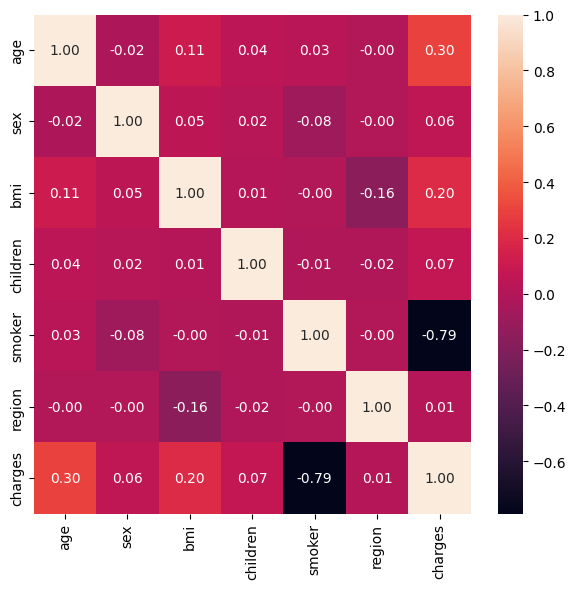

In [11]:
fig, axis = plt.subplots(figsize = (6, 6))

sns.heatmap(df_n.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

We can see that exist an important correlation betwen if smoker with the charges (-0.79). Have relation too betwen age-charges(0.30) and bmi-charges(0.20).

### Smoker vs charges

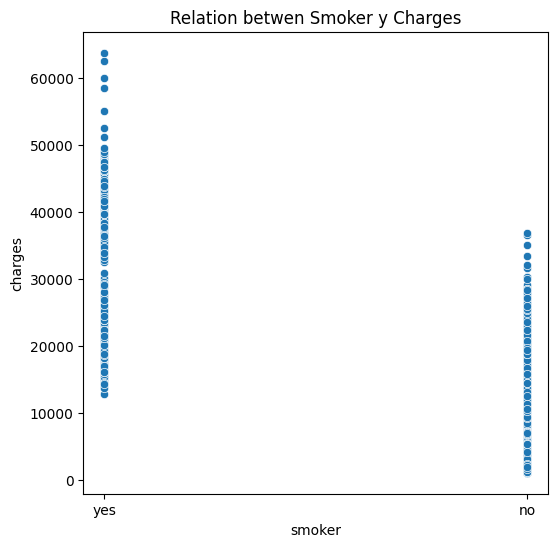

In [12]:
# Gráfico de dispersión de Fumador vs Cargos
plt.figure(figsize=(6, 6))
sns.scatterplot(x='smoker', y='charges', data=df)
plt.title('Relation betwen Smoker y Charges')
plt.show()

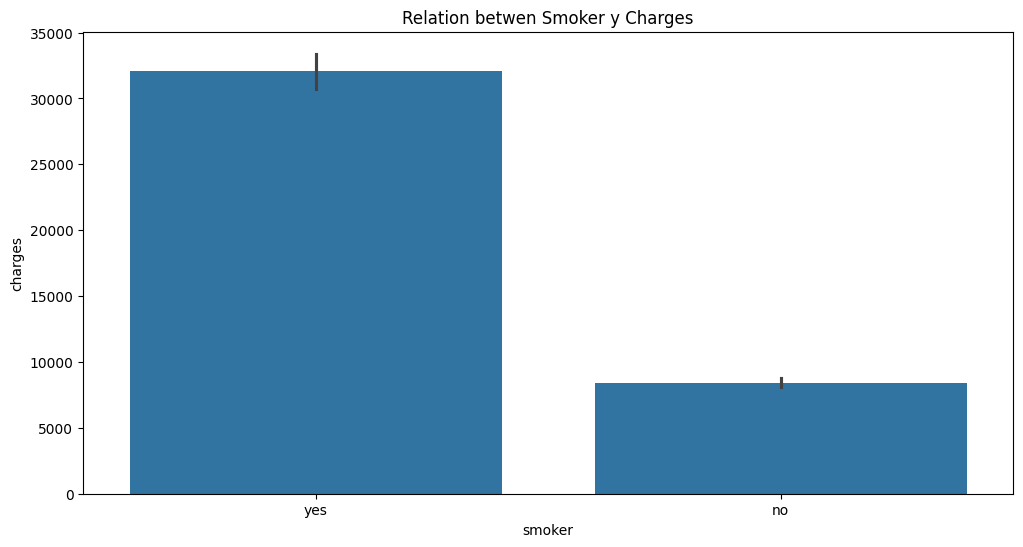

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Relation betwen Smoker y Charges')
plt.show()

### Age vs Charges

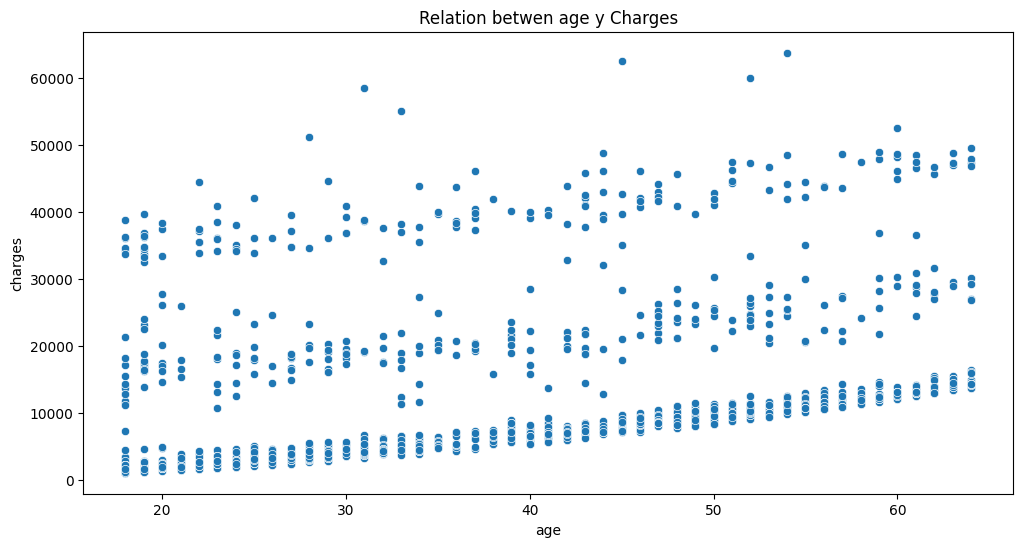

In [14]:
# Gráfico de dispersión de Edad vs Cargos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Relation betwen age y Charges')
plt.show()

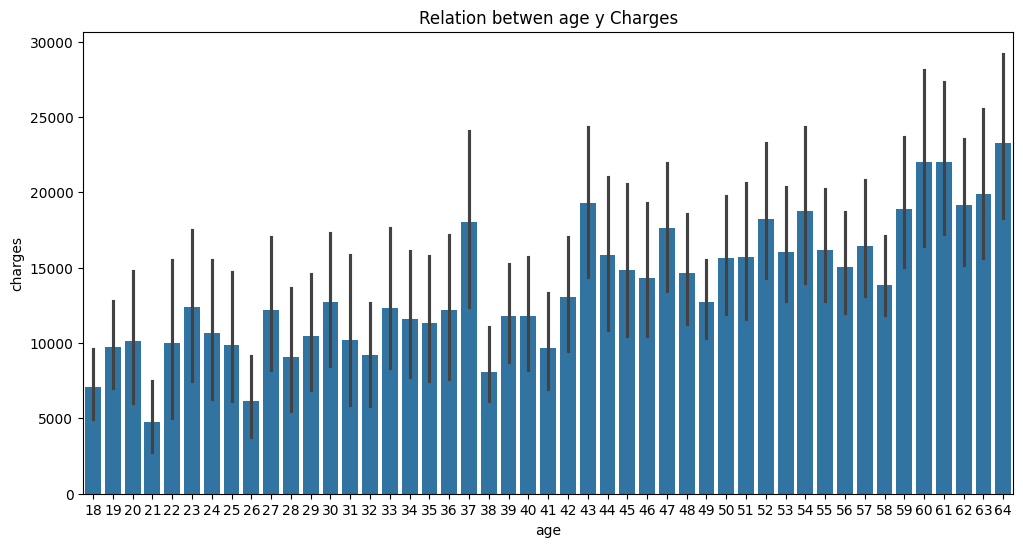

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='charges', data=df)
plt.title('Relation betwen age y Charges')
plt.show()

### BMI vs charges

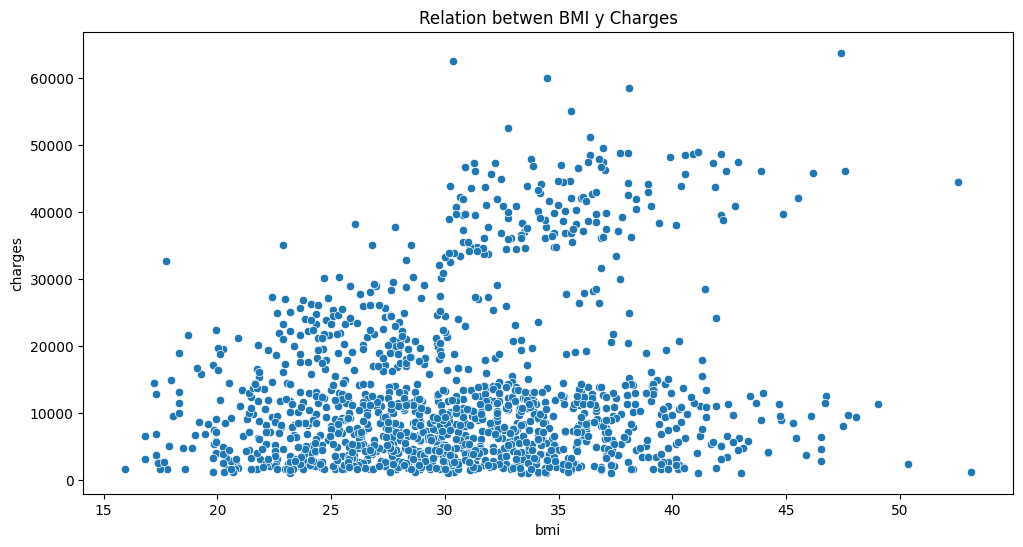

In [16]:
# Gráfico de dispersión de IMC vs Cargos
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Relation betwen BMI y Charges')
plt.show()

## Análisis univariante

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Variables categóricas:
- **Sex**
- **Smoker**
- **Region**

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [20]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

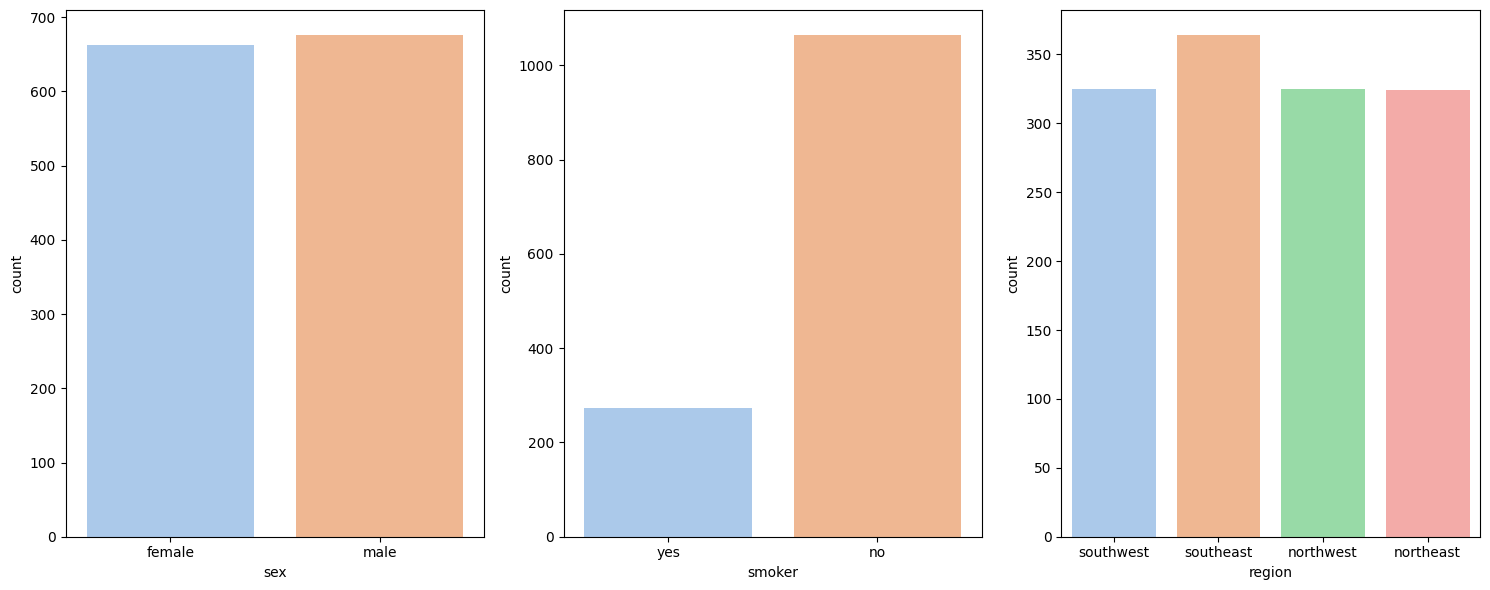

In [22]:
fig, axis = plt.subplots(1, 3, figsize = (15, 6))

sns.countplot(ax = axis[0], data = df, x = "sex", palette='pastel', hue= "sex", legend=False)
sns.countplot(ax = axis[1], data = df, x = "smoker", palette='pastel', hue= "smoker", legend=False)
sns.countplot(ax = axis[2], data = df, x = "region", palette='pastel', hue= "region", legend=False)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Sex: more or less the same values
- Smoker: almost 1/5 smokers of total
- Region: the same values in southwest, northwest, northeast and a little bit more in southeast

### Variables numéricas:
- **Age**
- **BMI**
- **Children**
- **Charges**

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


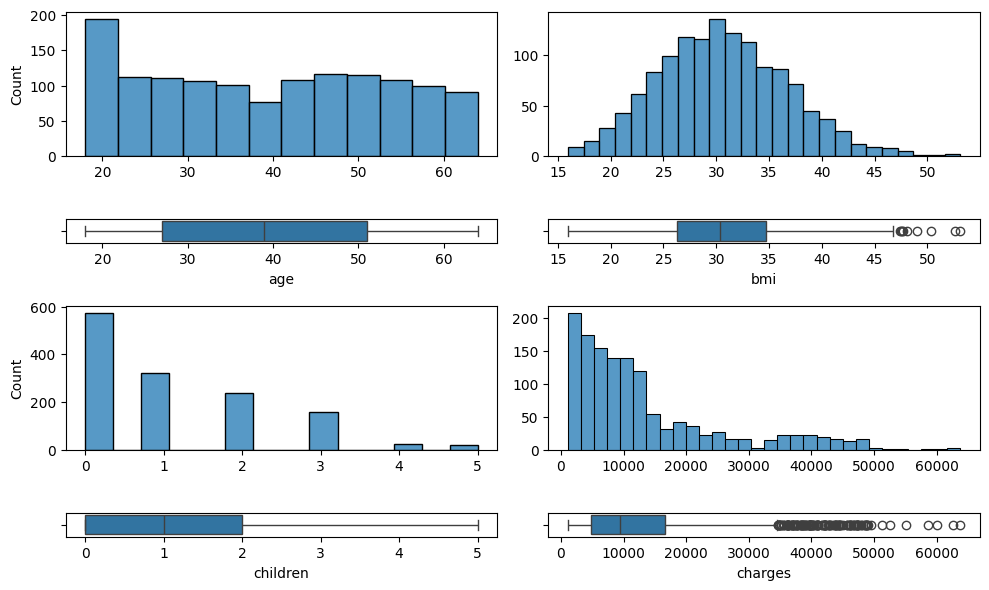

In [24]:
fig, axis = plt.subplots(4, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[2, 0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

sns.histplot(ax = axis[2, 1], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In age and children plots, don't have outliers. In bmi and charges we found some outliers.

As a general rule, we find a fairly normal and symmetrical distribution. The values for age, children, and charges show a continuous decline, while the plot for BMI displays a bell curve.

## Análisis multivariante

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


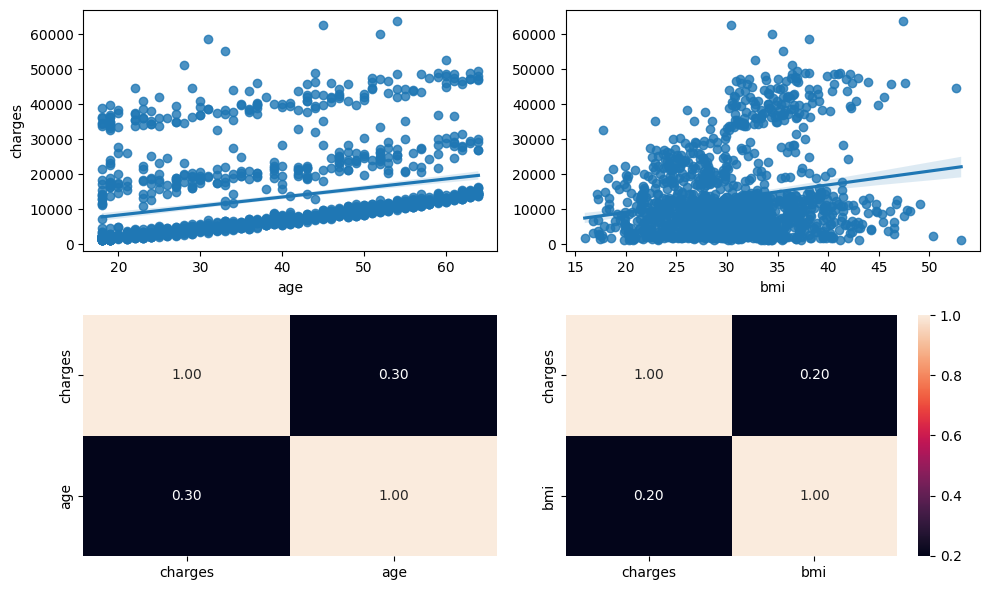

In [26]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

We can clearly see an increase in charges as the other two variables rise.

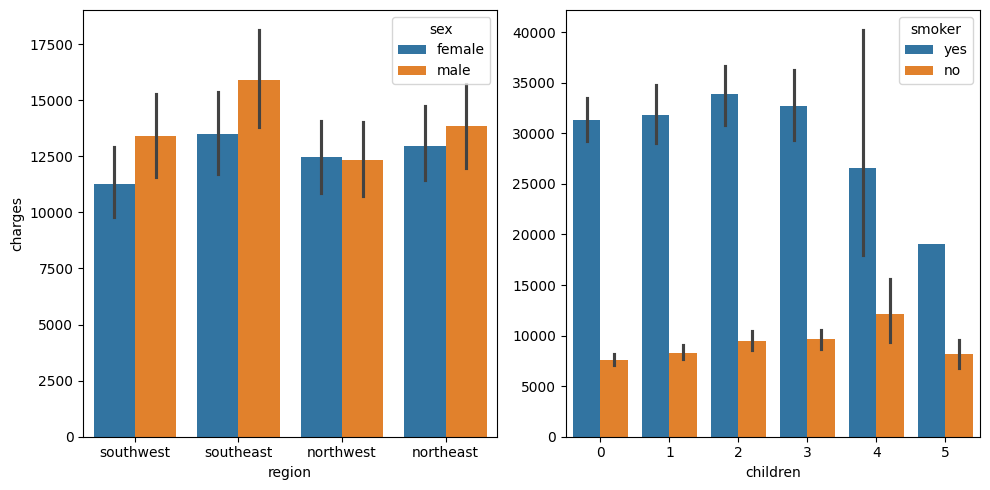

In [27]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)


sns.barplot(ax = axis[0], data = df, x = "region", y = "charges", hue = "sex")
sns.barplot(ax = axis[1], data = df, x = "children", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

## valores atípicos

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


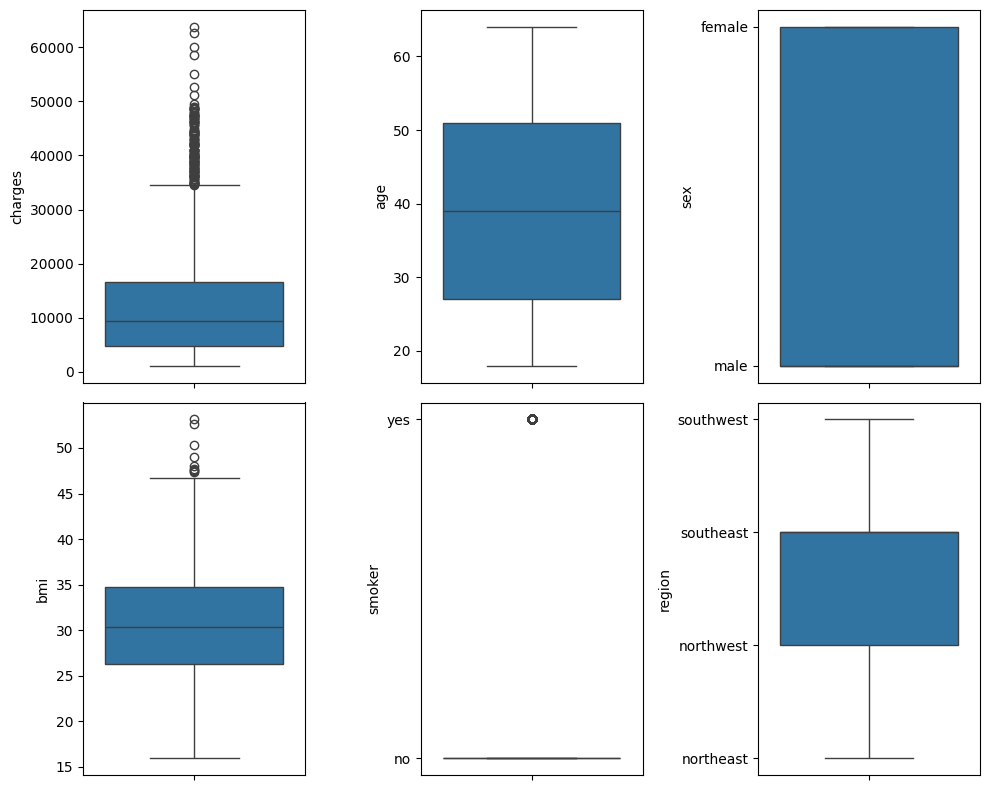

In [29]:
fig, axis = plt.subplots(2, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "charges")
sns.boxplot(ax = axis[0, 1], data = df, y = "age")
sns.boxplot(ax = axis[0, 2], data = df, y = "sex")
sns.boxplot(ax = axis[1, 0], data = df, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, y = "smoker")
sns.boxplot(ax = axis[1, 2], data = df, y = "region")

plt.tight_layout()

plt.show()

## Escalado

In [30]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [31]:
# "sex", "", "Embarked_n" las considero categoricas
num_variables = ["age", "bmi", "children"]

In [32]:
# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,age,bmi,children
560,0.472227,-1.756525,0.734336
1285,0.543313,-1.033082,-0.911192
1142,0.898745,-0.943687,-0.911192
969,-0.025379,0.622393,3.202629
486,1.040918,-1.504893,1.557100


In [33]:
X_test_num_scal.head()

,age,bmi,children
764,0.401140,-0.891539,0.734336
887,-0.238638,-0.089461,-0.911192
890,1.751782,-0.608453,-0.911192
1293,0.472227,-0.797177,1.557100
259,-1.447107,0.225079,-0.911192


In [34]:
a = scaler.transform(X_train[num_variables])

In [35]:
a

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

## Codificación

In [36]:
cat_variables = ["sex", "smoker", "region"]

In [37]:
# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_train[cat_variables])

# aplico el encoder en amhos
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_variables])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_variables])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns=onehot_encoder.get_feature_names_out(cat_variables))

X_train_cat_ohe.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_ohe], axis=1)

X_train_final.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,0.543313,-1.033082,-0.911192,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,0.898745,-0.943687,-0.911192,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,-0.025379,0.622393,3.202629,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,1.040918,-1.504893,1.557100,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# instanciamos el modelo con valores por defecto
model = LinearRegression()

# entrenamos
model.fit(X_train_final, y_train)

LinearRegression()

In [40]:
print(f"Intercepto (b0): {model.intercept_}")
print(f"Coeficientes (b1): {model.coef_}")

Intercepto (b0): 20311.928139319265
Coeficientes (b1): [ 3.61497541e+03  2.03622812e+03  5.16890247e+02  9.29584582e+00
 -9.29584582e+00 -1.18255644e+04  1.18255644e+04  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02]


In [41]:
y_pred = model.predict(X_test_final)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 33596915.85136148
R² Score: 0.7835929767120722


In [45]:
param_grid = {'alpha': np.logspace(-4, 4, 50)}

# Ridge
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_final, y_train)

best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_final)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Best Alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R² Score: {r2_ridge}")

Ridge Regression - Best Alpha: 1.7575106248547894
Ridge Regression - Mean Squared Error: 33638898.13642885
Ridge Regression - R² Score: 0.7833225572074234


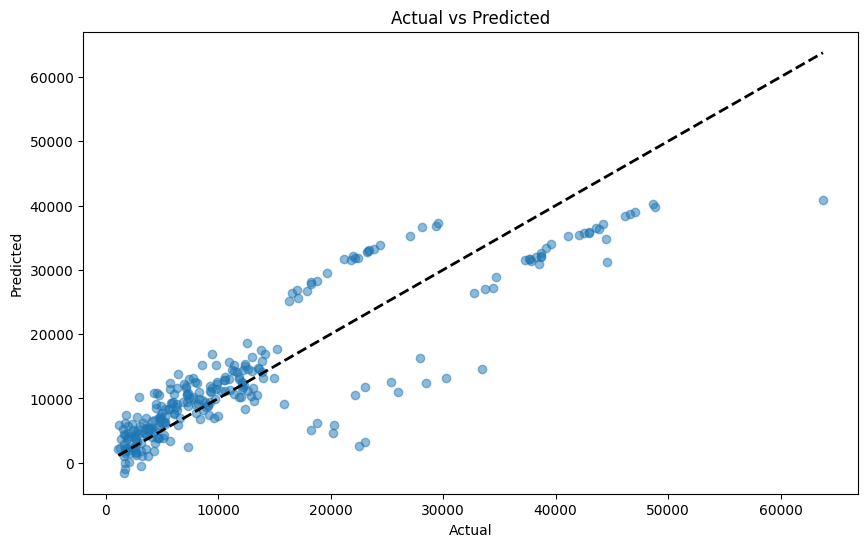

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()